# Feedforward Neural Network

Duan Lingfeng 

## 1. Load the Fashion-MINST dataset

In [1]:
import tensorflow as tf

from tensorflow import keras

import numpy as np
# To plot pretty figures
%matplotlib inline
import matplotlib.pyplot as plt

#mnist = keras.datasets.mnist
mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

In [2]:
X_train_full.shape,X_test.shape,tf.__version__,keras.__version__

((60000, 28, 28), (10000, 28, 28), '2.6.0', '2.6.0')

## 2. data preprocessing

  1. 训练集和测试集数据预处理Preprocessing of training and testing data
  2. 训练集中数据前5000为验证集The first 5000 data in the training set is the validation set

In [3]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

In [4]:
X_valid.shape, X_train.shape, X_test.shape

((5000, 28, 28), (55000, 28, 28), (10000, 28, 28))

## 3.data visualization

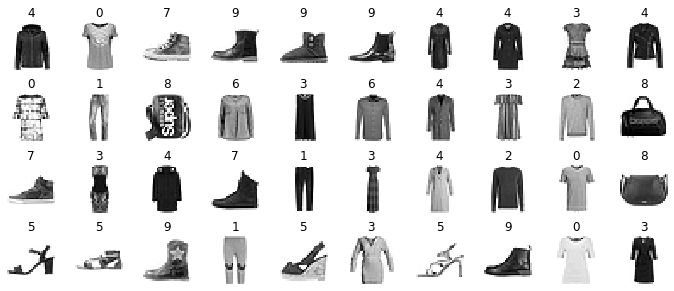

In [5]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(y_train[index], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

## 1 Building a Feedforward Neural Network

### 1. Defining a Sequential Neural Network

In [6]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [7]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


### 2. Model compilation, defining loss functions and optimization methods

In [8]:
# 确定损失函数和优化方法 Determining the loss function and optimization method
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

### 3. model training

Epoch 1/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.7218 - accuracy: 0.7641 - val_loss: 0.5267 - val_accuracy: 0.8174
Epoch 2/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4901 - accuracy: 0.8275 - val_loss: 0.4363 - val_accuracy: 0.8516
Epoch 3/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4436 - accuracy: 0.8443 - val_loss: 0.5249 - val_accuracy: 0.8030
Epoch 4/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4166 - accuracy: 0.8538 - val_loss: 0.3973 - val_accuracy: 0.8654
Epoch 5/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3975 - accuracy: 0.8602 - val_loss: 0.3805 - val_accuracy: 0.8672
Epoch 6/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3788 - accuracy: 0.8662 - val_loss: 0.3778 - val_accuracy: 0.8734
Epoch 7/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3668 - accuracy: 0.8706 - val_loss: 0.3651 - val_accuracy:

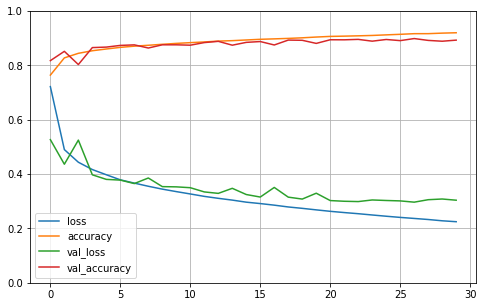

In [9]:
history = model.fit(X_train, y_train, epochs=30,validation_data=(X_valid, y_valid))

#draw
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
#save_fig("keras_learning_curves_plot")
plt.show()

### 4. Model evaluation

   模型在测试数据集上的表现

In [10]:
#Model evaluation
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3364 - accuracy: 0.8822


[0.3363688588142395, 0.8822000026702881]

## Using callback functions to early stop and save the model

In [11]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[28,28]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

#Early stopping using callback functions
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=30,validation_data=(X_valid, y_valid),callbacks=[checkpoint_cb, early_stopping_cb])
mse_test = model.evaluate(X_test, y_test)

Epoch 1/30
1719/1719 [==============================] - 11s 6ms/step - loss: 6.3751 - val_loss: 4.4458
Epoch 2/30
1719/1719 [==============================] - 10s 6ms/step - loss: 4.4622 - val_loss: 4.1464
Epoch 3/30
1719/1719 [==============================] - 10s 6ms/step - loss: 4.2704 - val_loss: 4.0226
Epoch 4/30
1719/1719 [==============================] - 10s 6ms/step - loss: 4.1730 - val_loss: 3.9582
Epoch 5/30
1719/1719 [==============================] - 10s 6ms/step - loss: 4.1060 - val_loss: 3.8887
Epoch 6/30
1719/1719 [==============================] - 10s 6ms/step - loss: 4.0495 - val_loss: 3.8449
Epoch 7/30
1719/1719 [==============================] - 10s 6ms/step - loss: 4.0070 - val_loss: 3.8220
Epoch 8/30
1719/1719 [==============================] - 10s 6ms/step - loss: 3.9717 - val_loss: 3.7816
Epoch 9/30
1719/1719 [==============================] - 10s 6ms/step - loss: 3.9464 - val_loss: 3.7820
Epoch 10/30
1719/1719 [==============================] - 10s 6ms/step - l

In [12]:
#save model
model.save("my_keras_model.h5")

Loading Models and Model Evaluation

In [13]:
#load model
model = keras.models.load_model("my_keras_model.h5")

#Model evaluation
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 3.7343


3.7342917919158936

Display model learning results in tensorborard

In [14]:
import os
root_logdir = os.path.join(os.curdir, "my_logs")

def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()
run_logdir

keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[28,28]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, tensorboard_cb])

print("save path as：" + run_logdir)

Epoch 1/30
1719/1719 [==============================] - 11s 6ms/step - loss: 6.3751 - val_loss: 4.4458
Epoch 2/30
1719/1719 [==============================] - 10s 6ms/step - loss: 4.4622 - val_loss: 4.1464
Epoch 3/30
1719/1719 [==============================] - 10s 6ms/step - loss: 4.2704 - val_loss: 4.0226
Epoch 4/30
1719/1719 [==============================] - 10s 6ms/step - loss: 4.1730 - val_loss: 3.9582
Epoch 5/30
1719/1719 [==============================] - 10s 6ms/step - loss: 4.1060 - val_loss: 3.8887
Epoch 6/30
1719/1719 [==============================] - 11s 6ms/step - loss: 4.0495 - val_loss: 3.8449
Epoch 7/30
1719/1719 [==============================] - 10s 6ms/step - loss: 4.0070 - val_loss: 3.8220
Epoch 8/30
1719/1719 [==============================] - 10s 6ms/step - loss: 3.9717 - val_loss: 3.7816
Epoch 9/30
1719/1719 [==============================] - 10s 6ms/step - loss: 3.9464 - val_loss: 3.7820
Epoch 10/30
1719/1719 [==============================] - 10s 6ms/step - l

In [15]:
%load_ext tensorboard
%tensorboard --logdir=./my_logs

Reusing TensorBoard on port 6006 (pid 11328), started 0:27:49 ago. (Use '!kill 11328' to kill it.)